In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#opens the original data file
def open_og_file():
    file=open("job_title_og_file.csv","r")
    return file

In [3]:
#summary: total number of data points
cnt=0
for line in open_og_file():
    cnt+=1
cnt

1630

In [4]:

#collects all the unique words in job titles
def collect():
    titlesalary={}
    seconddic={}
    file=open_og_file()
    for line in file:      
        line1=line.split(",")
        salary=line1[1]
        jobtitle=line1[0]
        titlesalary[eval(salary)]=jobtitle.lower().split()
    for money,title in titlesalary.items():
        if money=="d":
            continue
        for word in title:
            if word not in seconddic:
                seconddic[word]=[money]
            else:
                seconddic[word].append(money)
                
    for key, item in seconddic.items():
        if key!= 'title':
            seconddic[key]=sum(item)/len(item)
    return seconddic
collect()
store=collect()

In [27]:
store

{'editor': 93527.08988764045,
 'motion': 34800.0,
 'graphics': 88980.0,
 'designer': 52284.857142857145,
 'freelance': 12000.0,
 'reporter': 64341.354838709674,
 'copy': 34278.8,
 'graphic': 58064.666666666664,
 'artist': 12694.0,
 'staff': 55865.333333333336,
 'writer': 59768.38888888889,
 'midday': 16000.0,
 'radio': 16000.0,
 'host': 16000.0,
 'associate': 58024.0,
 'community': 19000.0,
 'journalist': 54108.333333333336,
 'senior': 107613.8947368421,
 'digital': 45447.0,
 'content': 67920.57142857143,
 'specialist': 39007.75,
 'health': 30000.0,
 'sports': 27186.666666666668,
 'anchor': 125000.0,
 'producer': 87401.43902439025,
 'mmj': 27560.0,
 'online': 29500.0,
 'part-time': 29744.0,
 'editorial': 107790.0,
 'assistant': 49947.28571428572,
 'managing': 73114.33333333333,
 'crime': 30680.0,
 'multimedia': 31100.0,
 'communications': 31138.0,
 'photographer': 58000.0,
 'i': 33800.0,
 'lifestyle': 34100.0,
 'news': 59442.0,
 'coordinator': 54140.0,
 'page': 44964.666666666664,
 'co

In [28]:
dict_panda={}
for key,value in store.items():
    badlist=["in","ret","and","this","of","&","submission"]
    if key in badlist:
        continue
    if "jobtitle" not in dict_panda:
        dict_panda['jobtitle']=[key]
    else:
        dict_panda['jobtitle'].append(key)
    if "salary" not in dict_panda:
        dict_panda['salary']=[value]
    else:
        dict_panda['salary'].append(value)


In [29]:
#change csv file into pandas dataframe to better sort rows
df=pd.DataFrame.from_dict(dict_panda)
df

,jobtitle,salary
0,editor,93527.089888
1,motion,34800.000000
2,graphics,88980.000000
3,designer,52284.857143
4,freelance,12000.000000
...,...,...
111,department,178500.000000
112,planning,135000.000000
113,major,145000.000000
114,president,500000.000000


In [30]:
df.sort_values(by=["salary"],inplace=True, ascending=False)
df.iloc[:19]

,jobtitle,salary
115,ceo,500000.000000
114,president,500000.000000
107,chief,248312.250000
111,department,178500.000000
98,lead,155250.000000
113,major,145000.000000
77,director,144318.181818
112,planning,135000.000000
71,section,131340.000000
72,leader,127040.000000


In [ ]:
df.to_csv("ordered_titles.csv")

In [8]:
#get the top 20 best paid words in job titles
def gettop5():
    top5list=[]
    cnt=0
    # the badlist are typos or filler words
    badlist=["in","ret","and","this","of","&","submission"]
    ordered=open("ordered_titles.csv","r")
    ordered.readline() #first line is title row
    for line in ordered:
        line1=line.split(",")
        keyword=line1[1]
        if keyword in badlist:
            continue
        if cnt<5:
            top5list.append(keyword)
        cnt+=1
    return top5list
gettop5()

['ceo', 'president', 'chief', 'department', 'lead']

In [9]:
#get the top 20 best paid words in job titles
def gettop20():
    top20list=[]
    cnt=0
    # the badlist are typos or filler words
    badlist=["in","ret","and","this","of","&","submission"]
    ordered=open("ordered_titles.csv","r")
    ordered.readline() #first line is title row
    for line in ordered:
        line1=line.split(",")
        keyword=line1[1]
        if keyword in badlist:
            continue
        if cnt<20:
            top20list.append(keyword)
        cnt+=1
    return top20list
gettop20()

['ceo',
 'president',
 'chief',
 'department',
 'lead',
 'major',
 'director',
 'planning',
 'section',
 'leader',
 'head',
 'anchor',
 'foreign',
 'sr.',
 'deputy',
 'supervising',
 'photo',
 'editorial',
 'senior',
 'animator']

In [22]:
dfdic={}
dfdic["top 20 words"]=gettop20()
df=pd.DataFrame.from_dict(dfdic)
df

,top 20 words
0,ceo
1,president
2,chief
3,department
4,lead
5,major
6,director
7,planning
8,section
9,leader


In [23]:
dfdic={}
dfdic["top 5 words"]=gettop5()
df=pd.DataFrame.from_dict(dfdic)
df

,top 5 words
0,ceo
1,president
2,chief
3,department
4,lead


In [10]:
#get male and female jobtitles separately and store in same dictionary
def getjobtitles():
    ogfile=open_og_file()
    genderdic={"male":[],"female":[]} # will be nested list
    for person in ogfile:
        person1=person.split(",")
        gender=person1[2]
        jobtitle=person1[0].strip().split() # a list that consists of words in the jobtitle
        if gender=="male":
            genderdic["male"].append(jobtitle)
        elif gender=="female":
            genderdic["female"].append(jobtitle)
    return genderdic
getjobtitles()

{'male': [['Editor'],
  ['Motion', 'Graphics', 'designer'],
  ['Graphic', 'Artist'],
  ['Midday', 'radio', 'host'],
  ['Associate', 'Editor'],
  ['Senior', 'Reporter'],
  ['Digital', 'Content', 'Specialist'],
  ['Assistant', 'Editor'],
  ['Reporter', 'Content', 'Provider'],
  ['Reporter', 'Content', 'Provider'],
  ['Editor'],
  ['Freelance', 'Journalist'],
  ['Podcast', 'Sidekick', 'and', 'Honorary', 'Producer'],
  ['Freelance', 'journalist'],
  ['Reporter'],
  ['Staff', 'reporter'],
  ['Sports', 'Education', 'reporter'],
  ['Staff', 'writer'],
  ['Sports', 'MMJ'],
  ['Reporter'],
  ['Reporter'],
  ['reporter'],
  ['Reporter'],
  ['Prep', 'sports', 'reporter'],
  ['Weekend', 'Anchor', 'Producer', 'and', 'MMJ'],
  ['Sports', 'reporter'],
  ['Sports', 'writer'],
  ['Online', 'Editor'],
  ['Magazine', 'Editor'],
  ['Advisor'],
  ['Reporter'],
  ['Graphic', 'Designer', 'and', 'Social', 'Media', 'Contributor'],
  ['Copy', 'Editor', 'Page', 'Designer'],
  ['Crime', 'reporter'],
  ['Reporter'

In [11]:
#how many males vs females have top 20 words in their job titles
def getmatched20():
    genderdic=getjobtitles()
    gendercnt={"male":0,"female":0}
    femalelist=genderdic["female"]
    malelist=genderdic["male"]
    
    for flist in femalelist:
        for fword in flist:
            if fword.strip().lower() in gettop20():
                gendercnt["female"]+=1
    for mlist in malelist:
        for mword in mlist:
            if mword.strip().lower() in gettop20():
                gendercnt["male"]+=1
    return gendercnt
getmatched20()

{'male': 136, 'female': 260}

In [12]:
#how many males vs females have top 5 words in their job titles
def getmatched5():
    genderdic=getjobtitles()
    gendercnt={"male":0,"female":0}
    femalelist=genderdic["female"]
    malelist=genderdic["male"]
    
    for flist in femalelist:
        for fword in flist:
            if fword.strip().lower() in gettop5():
                gendercnt["female"]+=1
    for mlist in malelist:
        for mword in mlist:
            if mword.strip().lower() in gettop5():
                gendercnt["male"]+=1
    return gendercnt
getmatched5()

{'male': 13, 'female': 17}

In [13]:
#final calculation out of total number of people in each gender
femaletotal=1095
maletotal=536
genderratio={"gender":("male","female")}
femaleratio20=getmatched20()['female']/femaletotal
maleratio20=getmatched20()['male']/maletotal
genderratio["ratio20"]=(maleratio20,femaleratio20)
genderratio

{'gender': ('male', 'female'),
 'ratio20': (0.2537313432835821, 0.2374429223744292)}

In [14]:
femaleratio5=getmatched5()['female']/femaletotal
maleratio5=getmatched5()['male']/maletotal
genderratio["ratio5"]=(maleratio5,femaleratio5)
genderratio

{'gender': ('male', 'female'),
 'ratio20': (0.2537313432835821, 0.2374429223744292),
 'ratio5': (0.024253731343283583, 0.015525114155251141)}

In [15]:
vizdf=pd.DataFrame.from_dict(genderratio)

In [16]:
vizdf

,gender,ratio20,ratio5
0,male,0.253731,0.024254
1,female,0.237443,0.015525


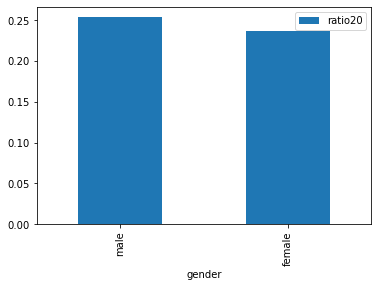

In [17]:
vizdf.plot(kind='bar', y='ratio20', x='gender')
plt.show()

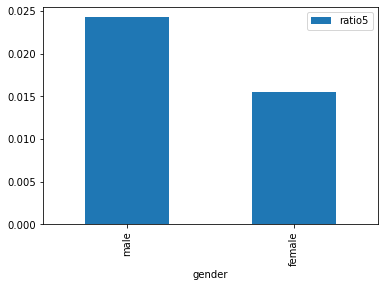

In [18]:
vizdf.plot(kind='bar', y='ratio5', x='gender')
plt.show()